In [2]:
import numpy as np
import matplotlib
from matplotlib import pyplot as plt
%matplotlib inline

#seaborns
plt.style.use(['seaborn-white', 'seaborn-paper'])
#calling rc is equivalent to setting rcParams
width = 3.5
# dpi = 100.0
# plt.rc('figure', figsize=(1920 / dpi, 1080 / dpi), dpi=dpi)
plt.rc('figure', figsize=(6, 3), dpi=600)
plt.rc('font', family='serif', serif='DejaVu Serif, Bitstream Vera Serif, New Century Schoolbook, Century Schoolbook L, Utopia, ITC Bookman, Bookman, Nimbus Roman No9 L, Times New Roman, Times, Palatino, Charter, serif')
plt.rc('text', usetex=False)
plt.rc('xtick', labelsize=8)
plt.rc('ytick', labelsize=8)
plt.rc('legend', fontsize=5, frameon=True)
plt.rc('axes', labelsize=8, titlesize=8)

In [3]:
fps_initial = 60
fps = 20

In [4]:
data = np.loadtxt('last.txt', delimiter=',')

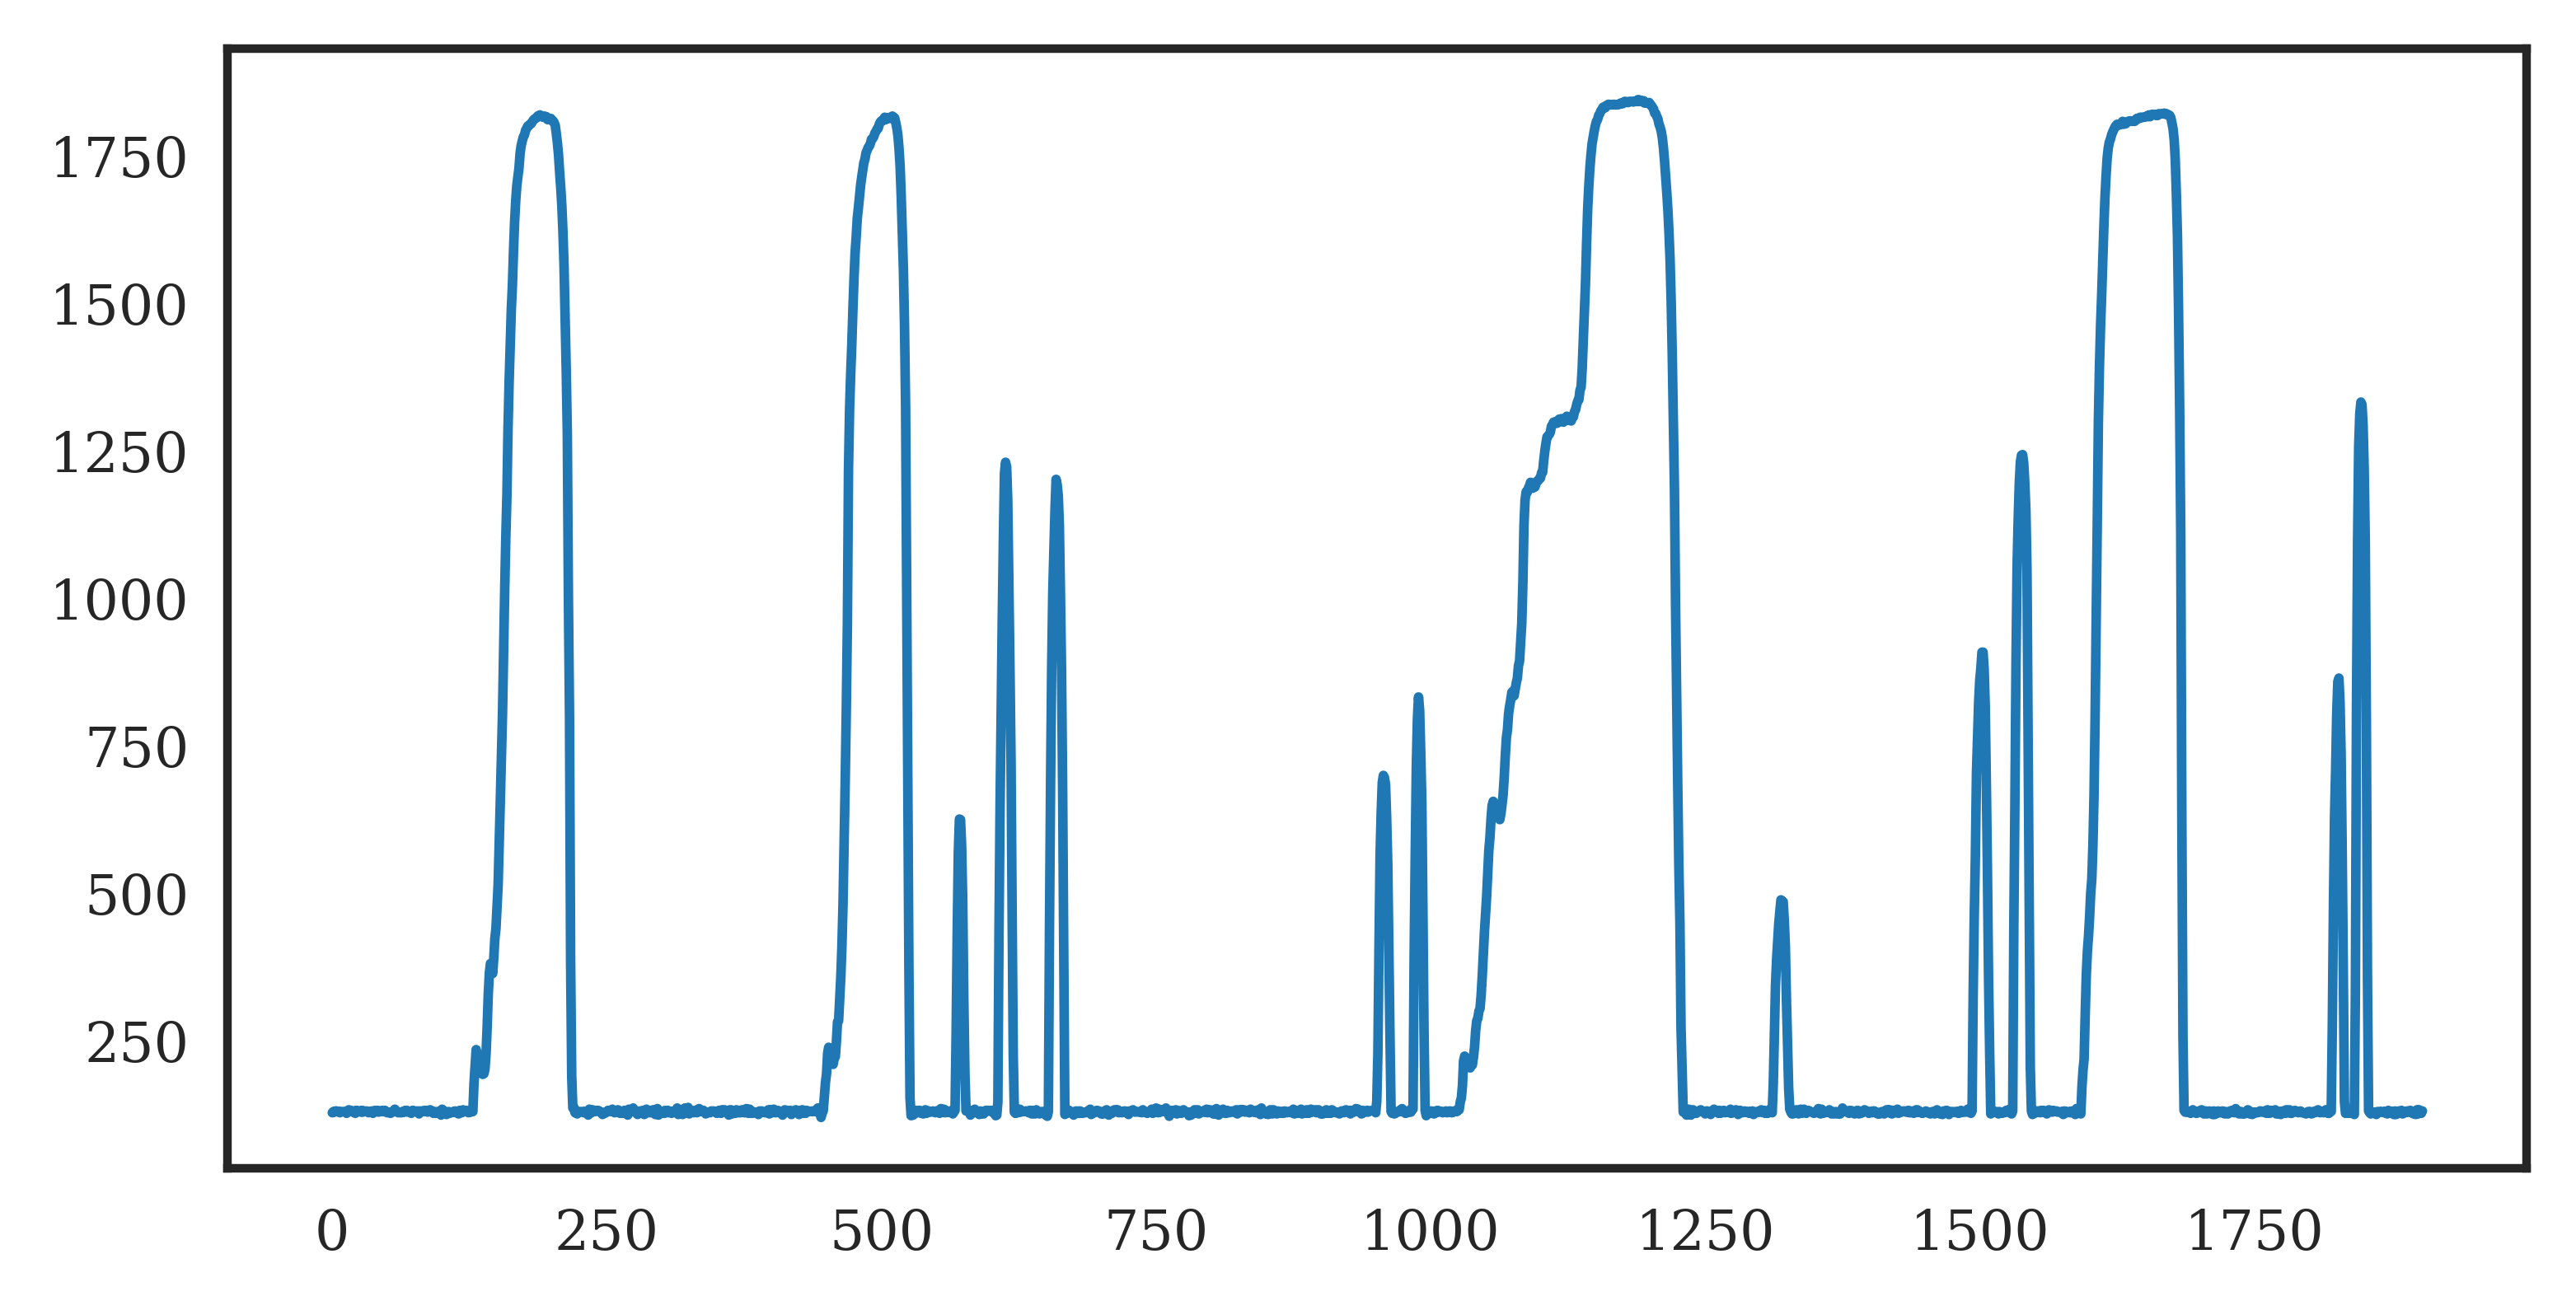

In [5]:
plt.plot(data[:,1] + data[:,2])
plt.show()

In [6]:
data.shape

(1904, 3)

In [7]:
time1 = np.array(data[:,0]) / 1000.0
left = np.array(data[:,1])
right = np.array(data[:,2])
force_sensors = (left + right) / 2

In [8]:
force = np.exp(force_sensors * 0.0052 - 2.5368)
force -= force.min()

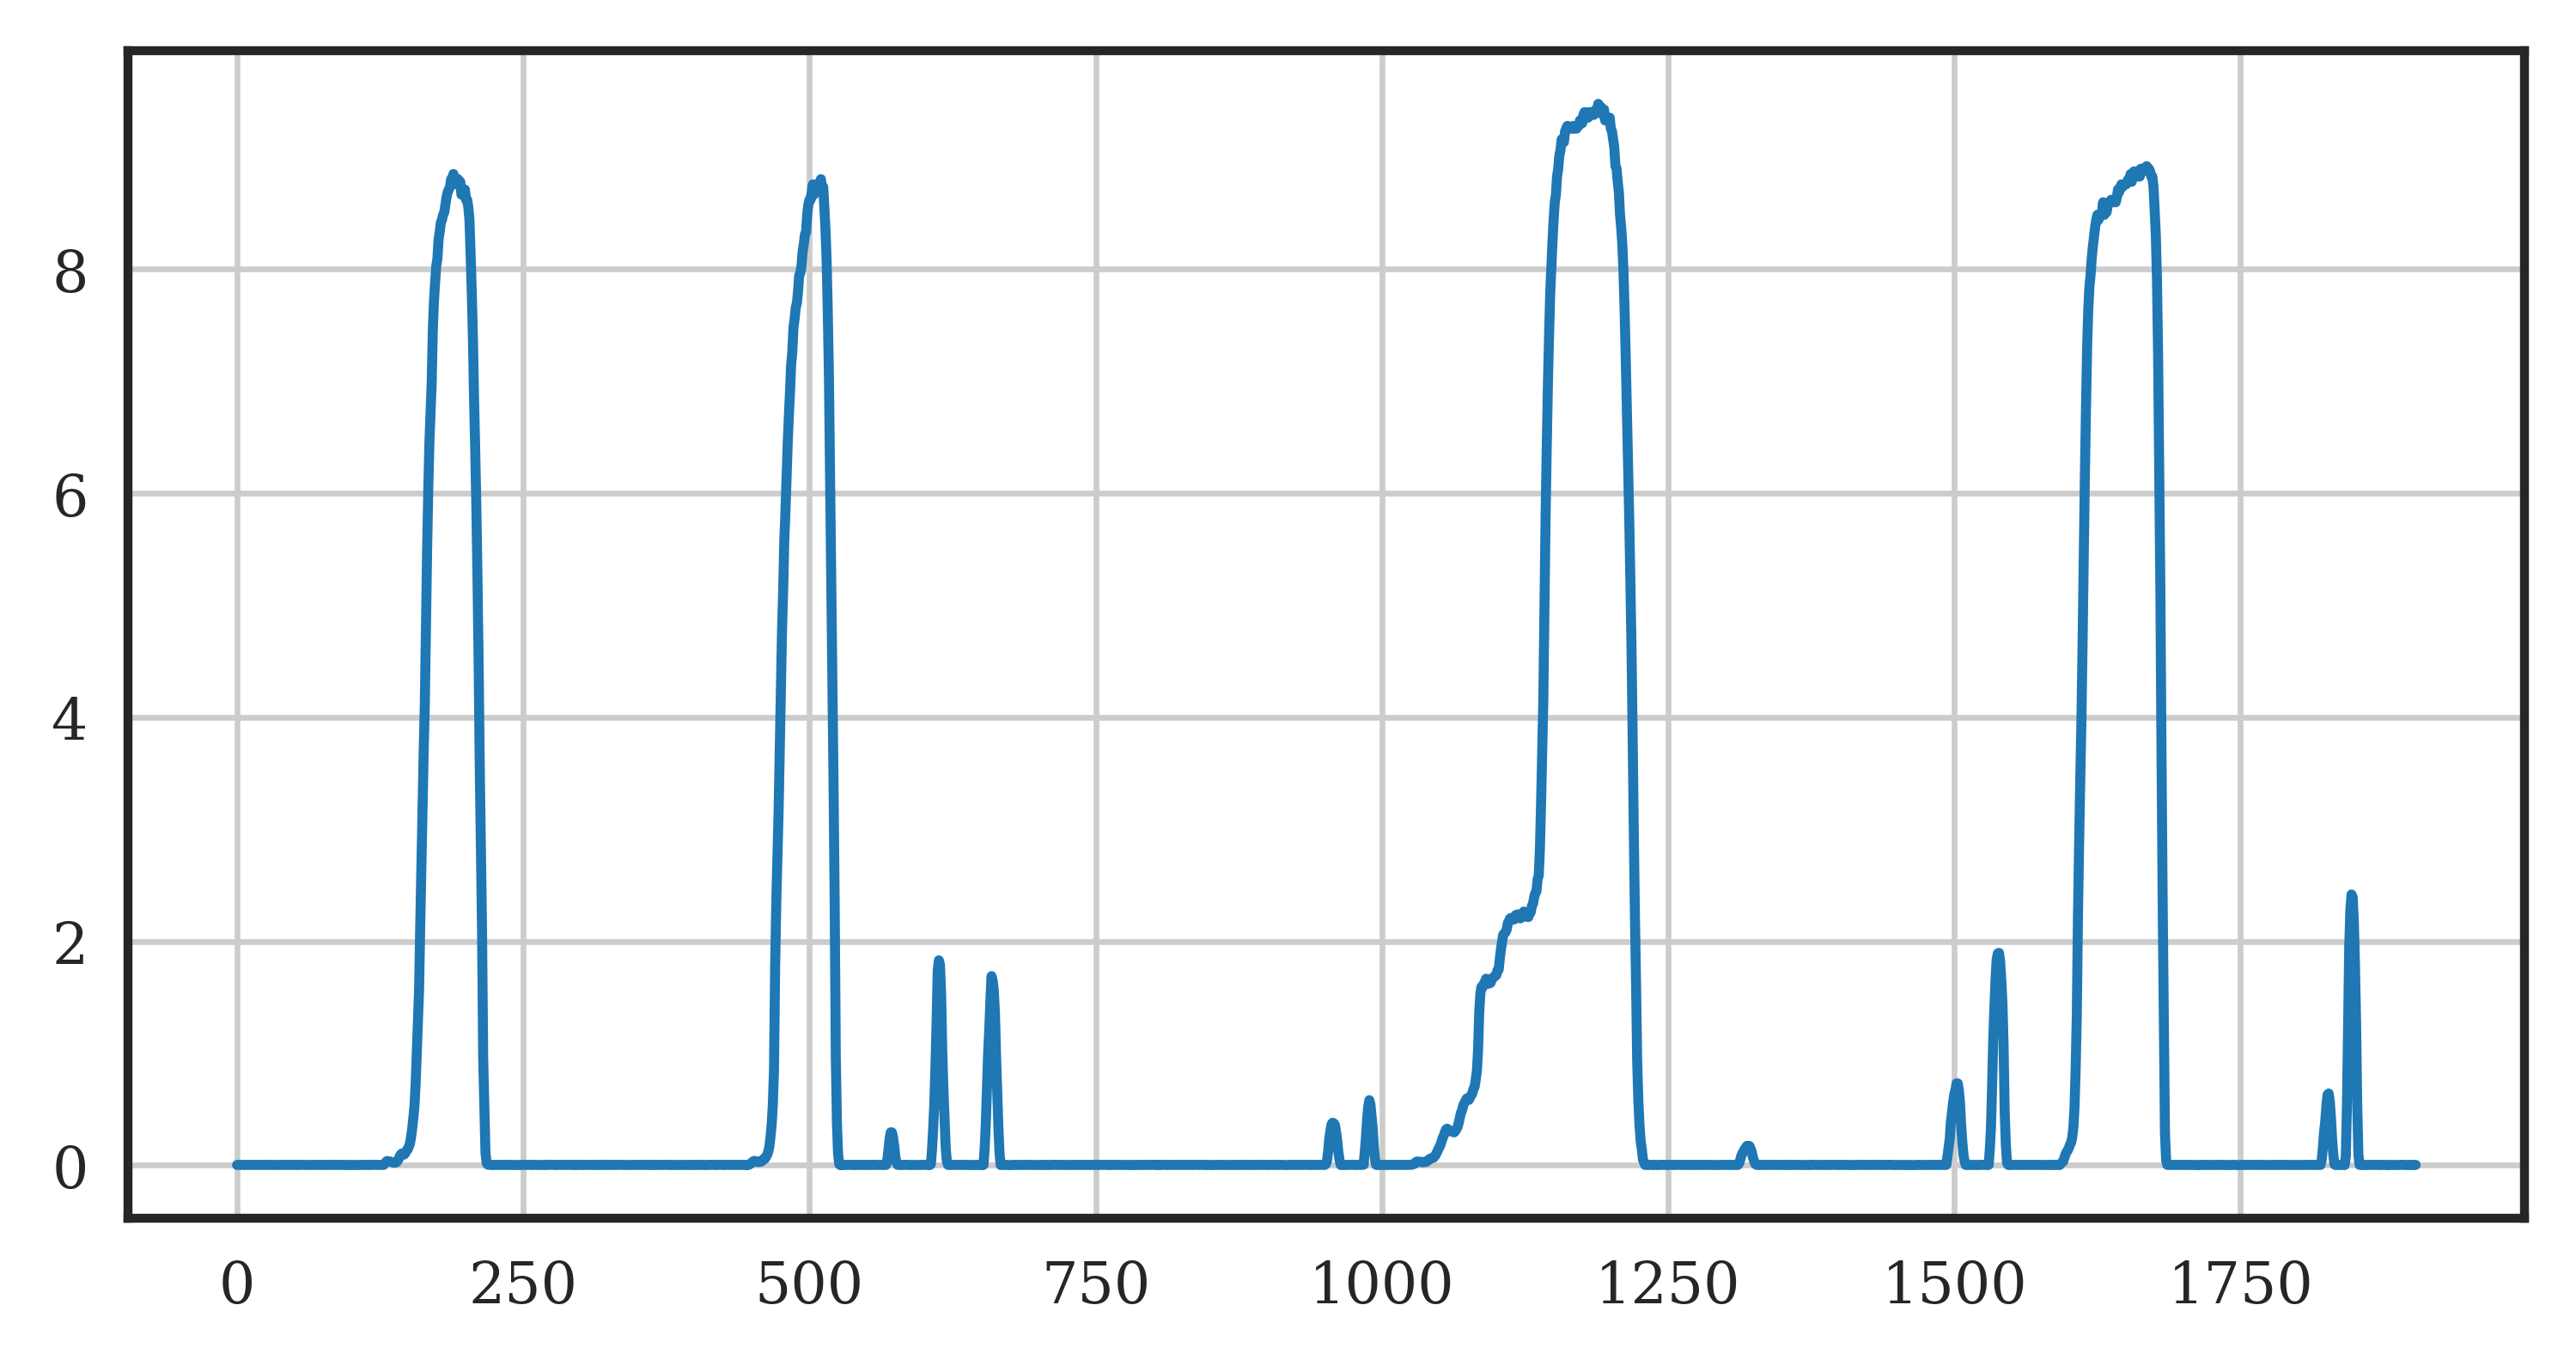

In [9]:
plt.plot(force)
plt.grid()
plt.show()

In [10]:
t_max = time1[-1]
n = int(t_max * fps)
t = np.arange(0, n) * (1 / fps)
frame_force = np.interp(t, time1, force)

In [11]:
frame_force[frame_force < 0.004] = np.nan

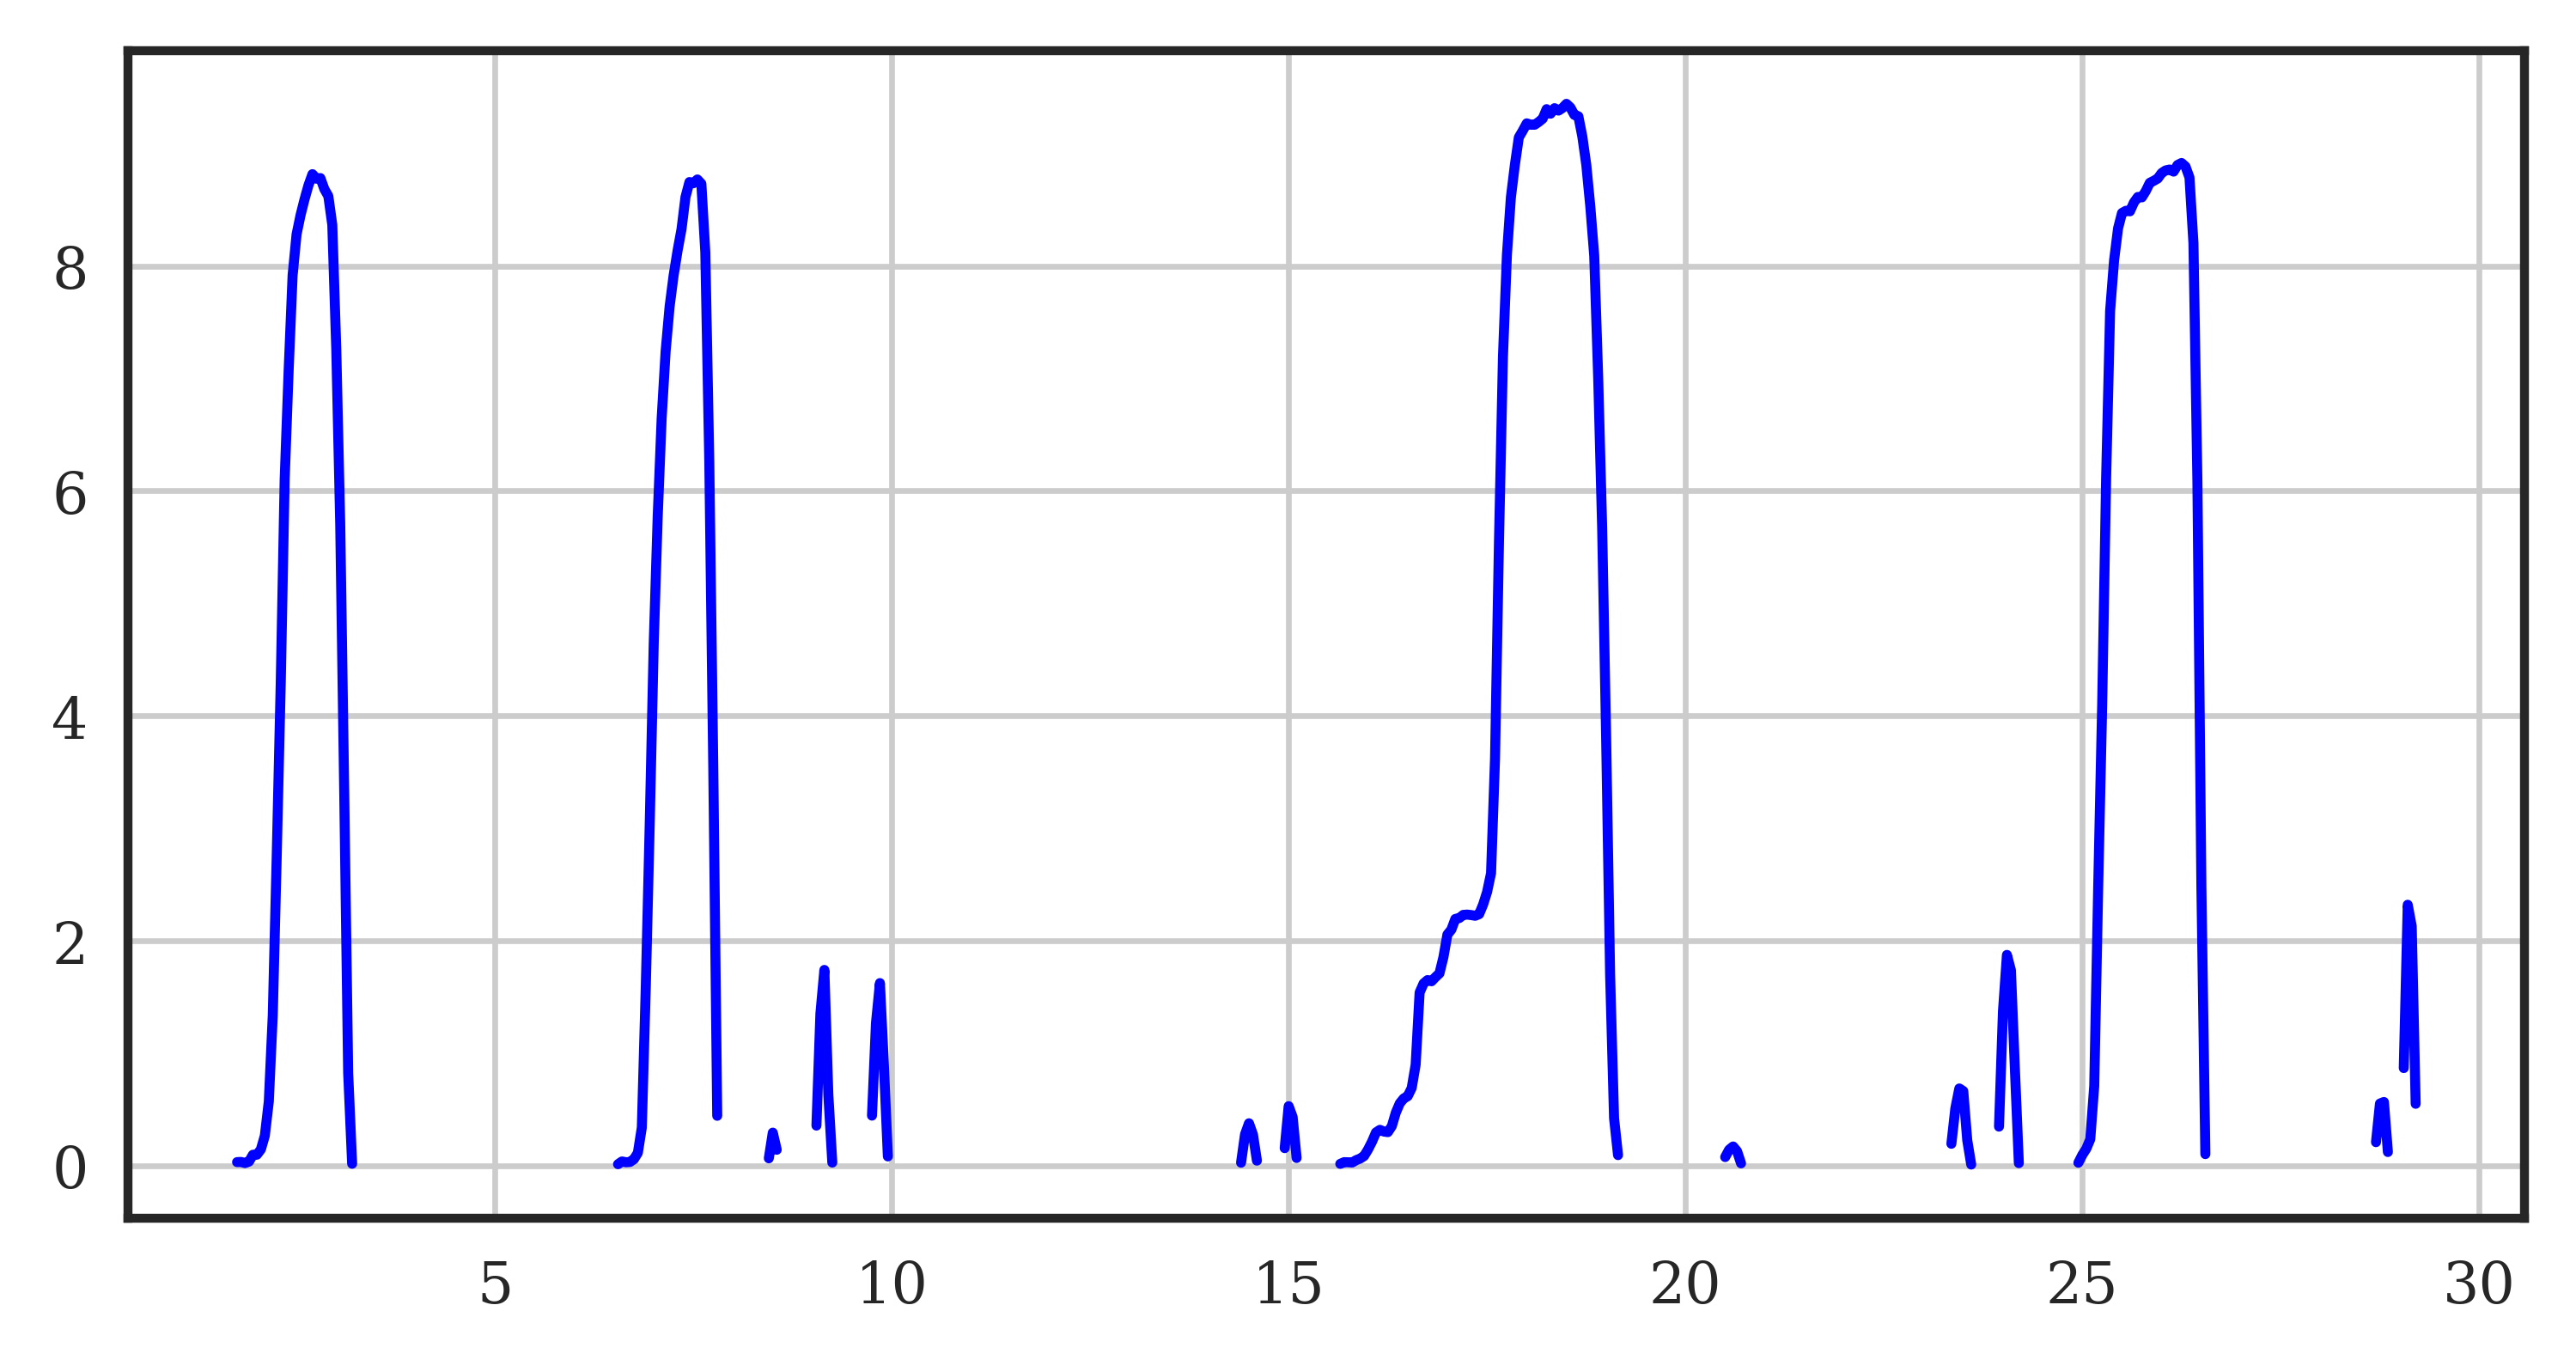

In [12]:
plt.plot(t, frame_force, "b")
plt.grid()
plt.show()

In [13]:
def add_noise(y, standard_deviation):
    return np.abs(y + np.random.normal(0, standard_deviation, len(y)))

In [14]:
frame_force_noisy = add_noise(frame_force, .5)

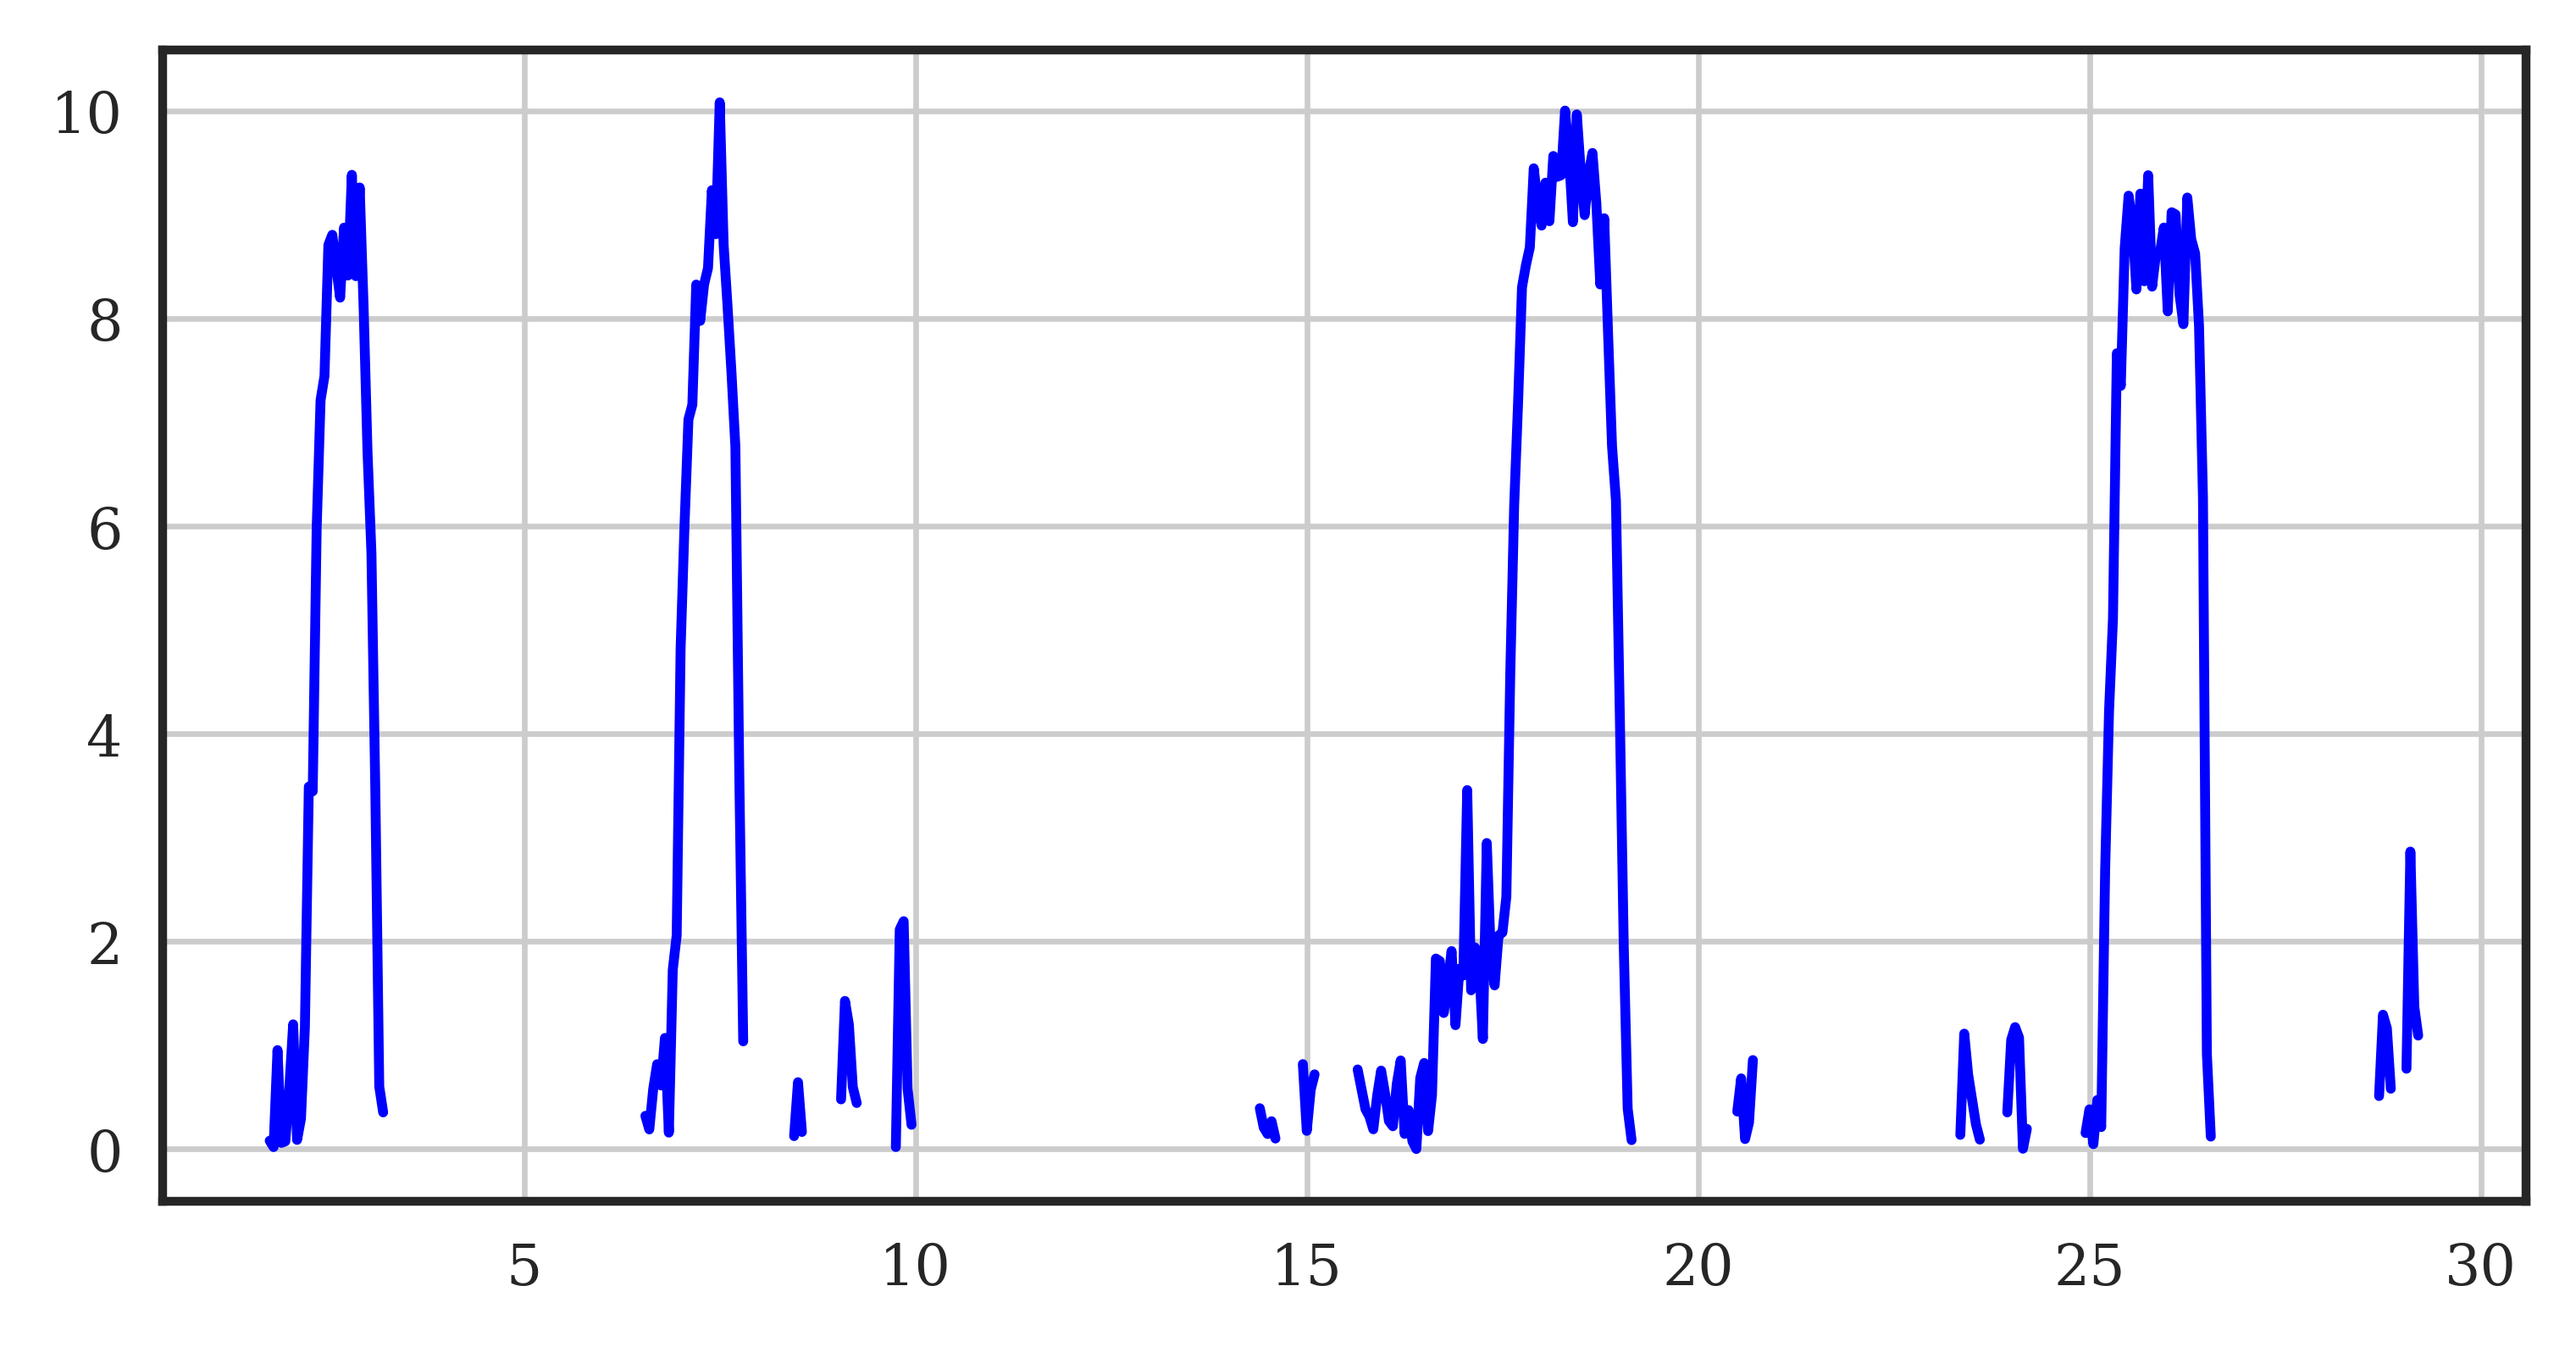

In [15]:
plt.plot(t, frame_force_noisy, "b")
plt.grid()
plt.show()

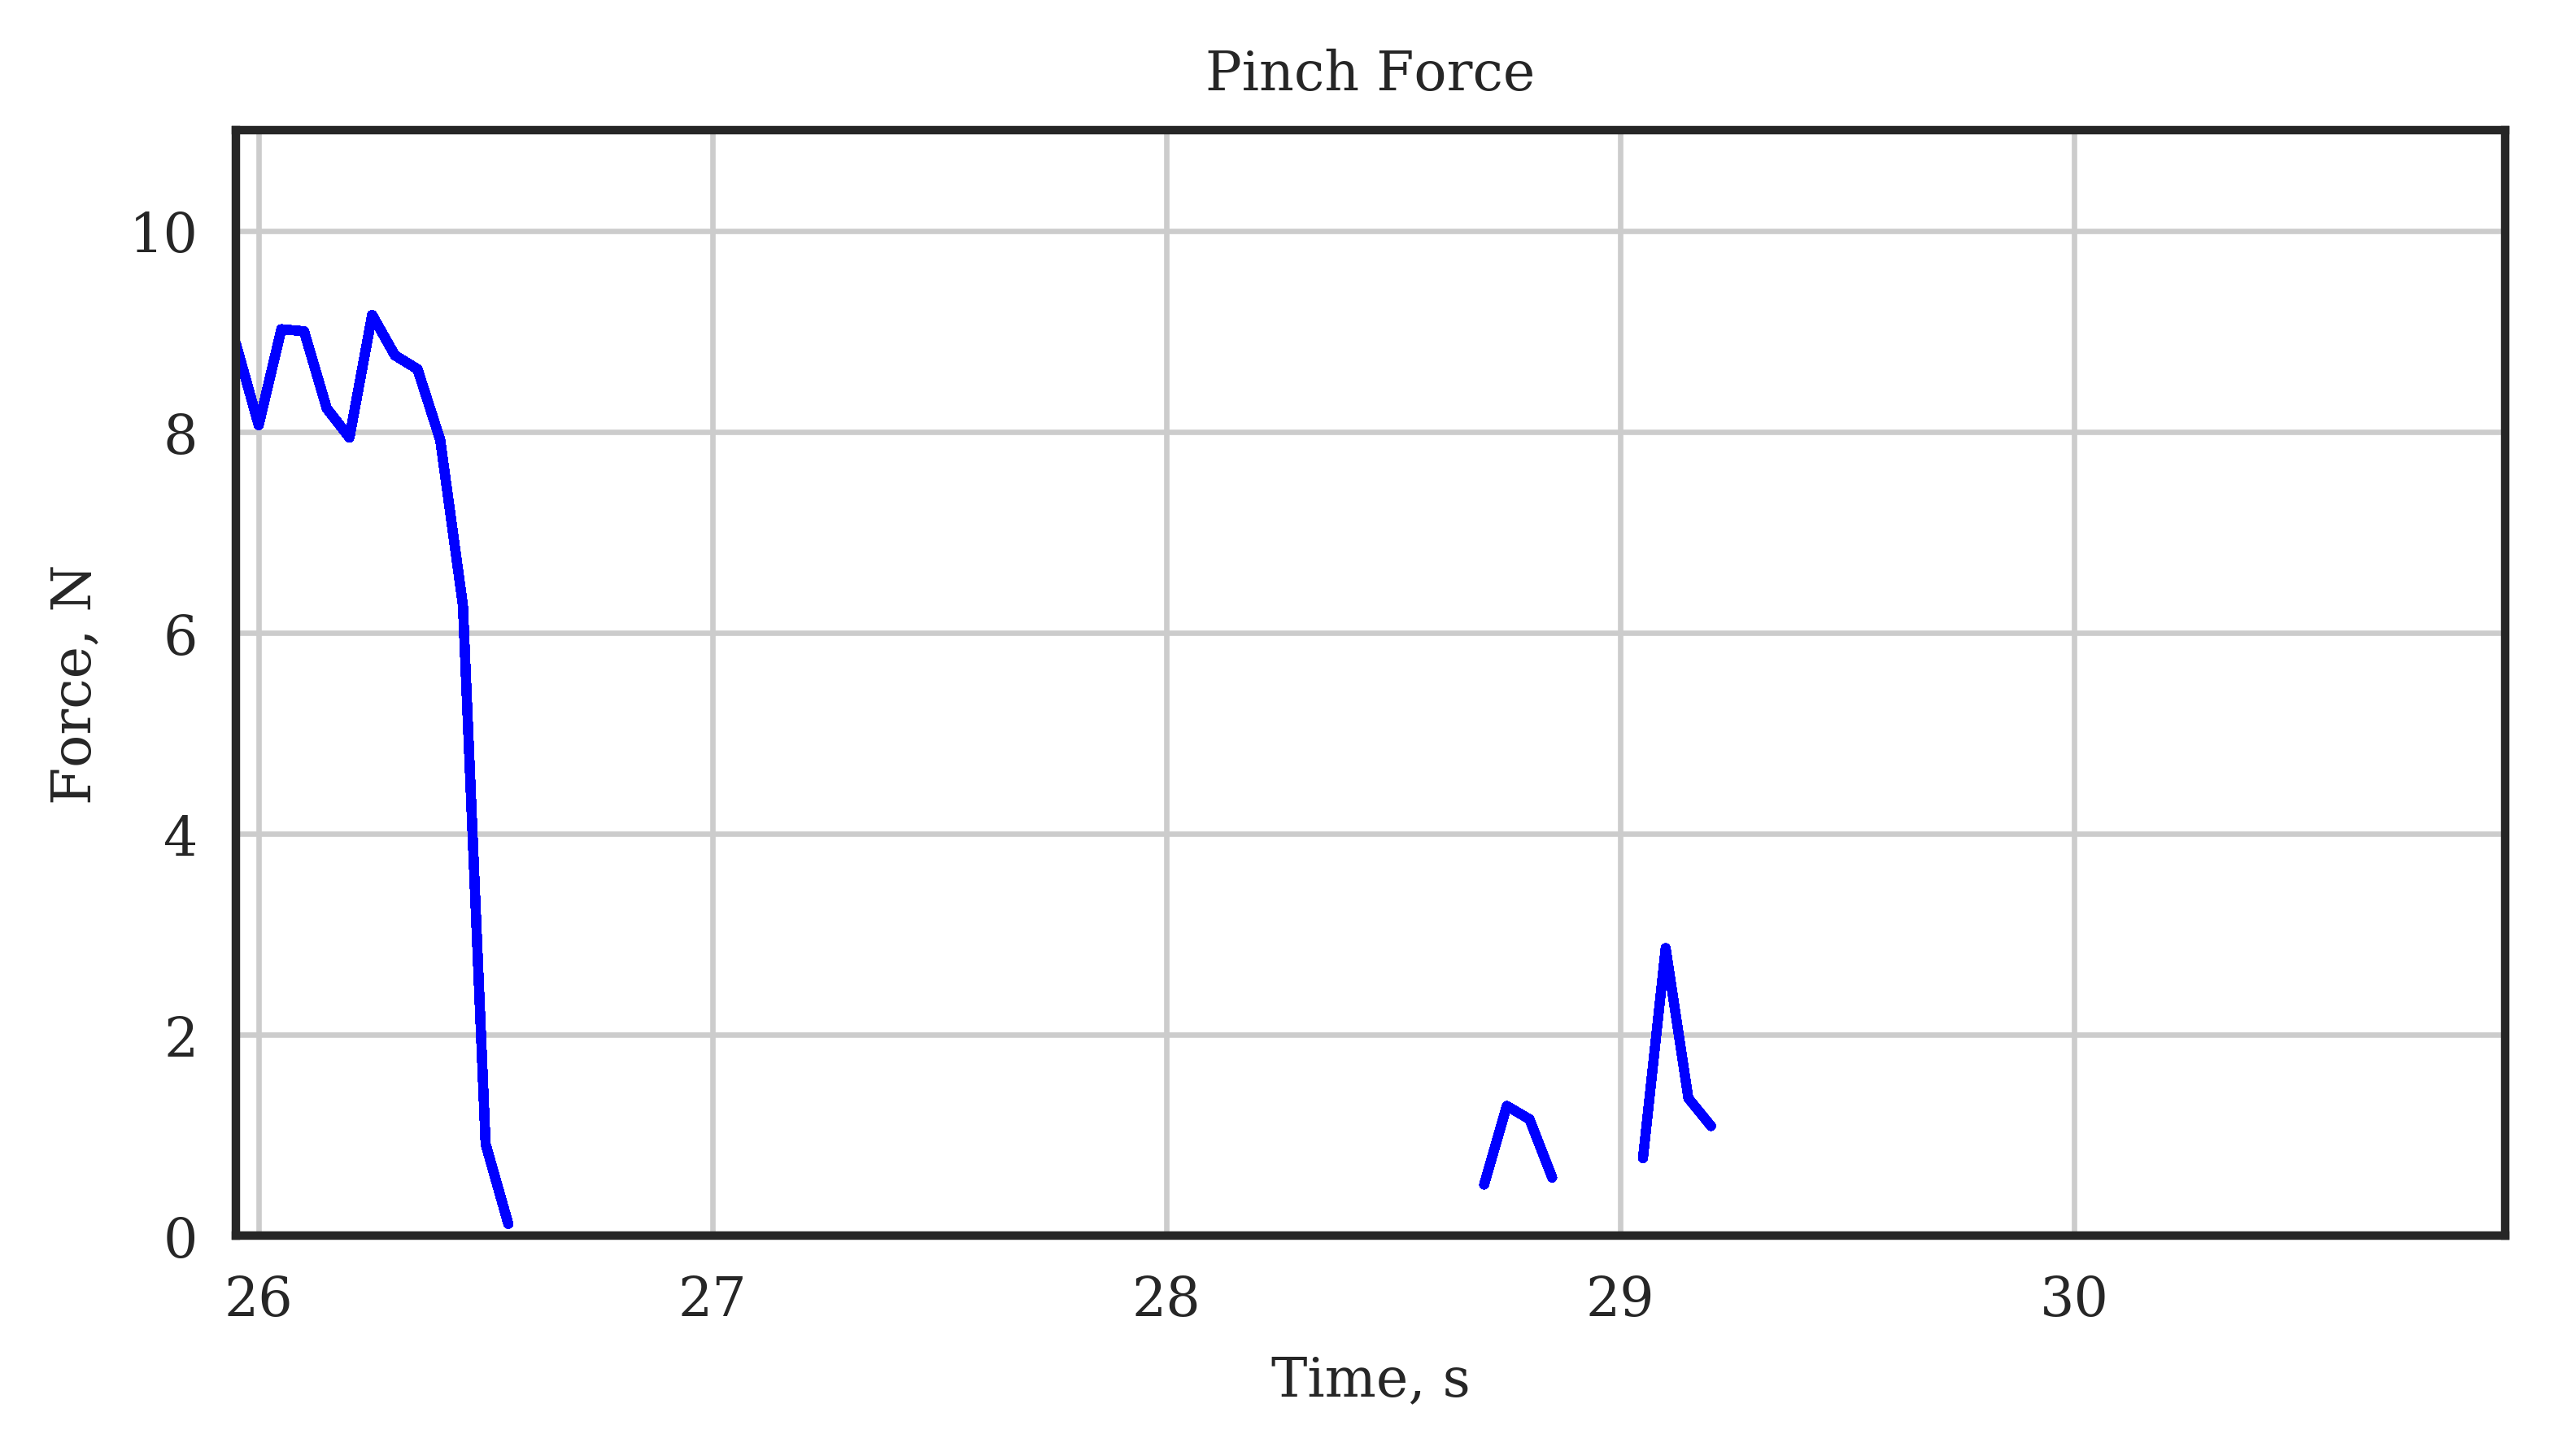

In [16]:
for i in range (0, t.shape[0], 1):
    plt.plot(t[:i], frame_force_noisy[:i], 'b')
    plt.grid(True)
    if t[i] <= 4:
        plt.xlim(0, 5)
        plt.ylim(0, 11)
    else:
        plt.xlim(t[i] - 4, t[i] + 1)
        plt.ylim(0, 11)
    
    plt.title("Pinch Force")
    plt.xlabel('Time, s')
    plt.ylabel('Force, N')
    plt.savefig('Pinch_Carolina/' + str(i) + '.png')
    #plt.show()

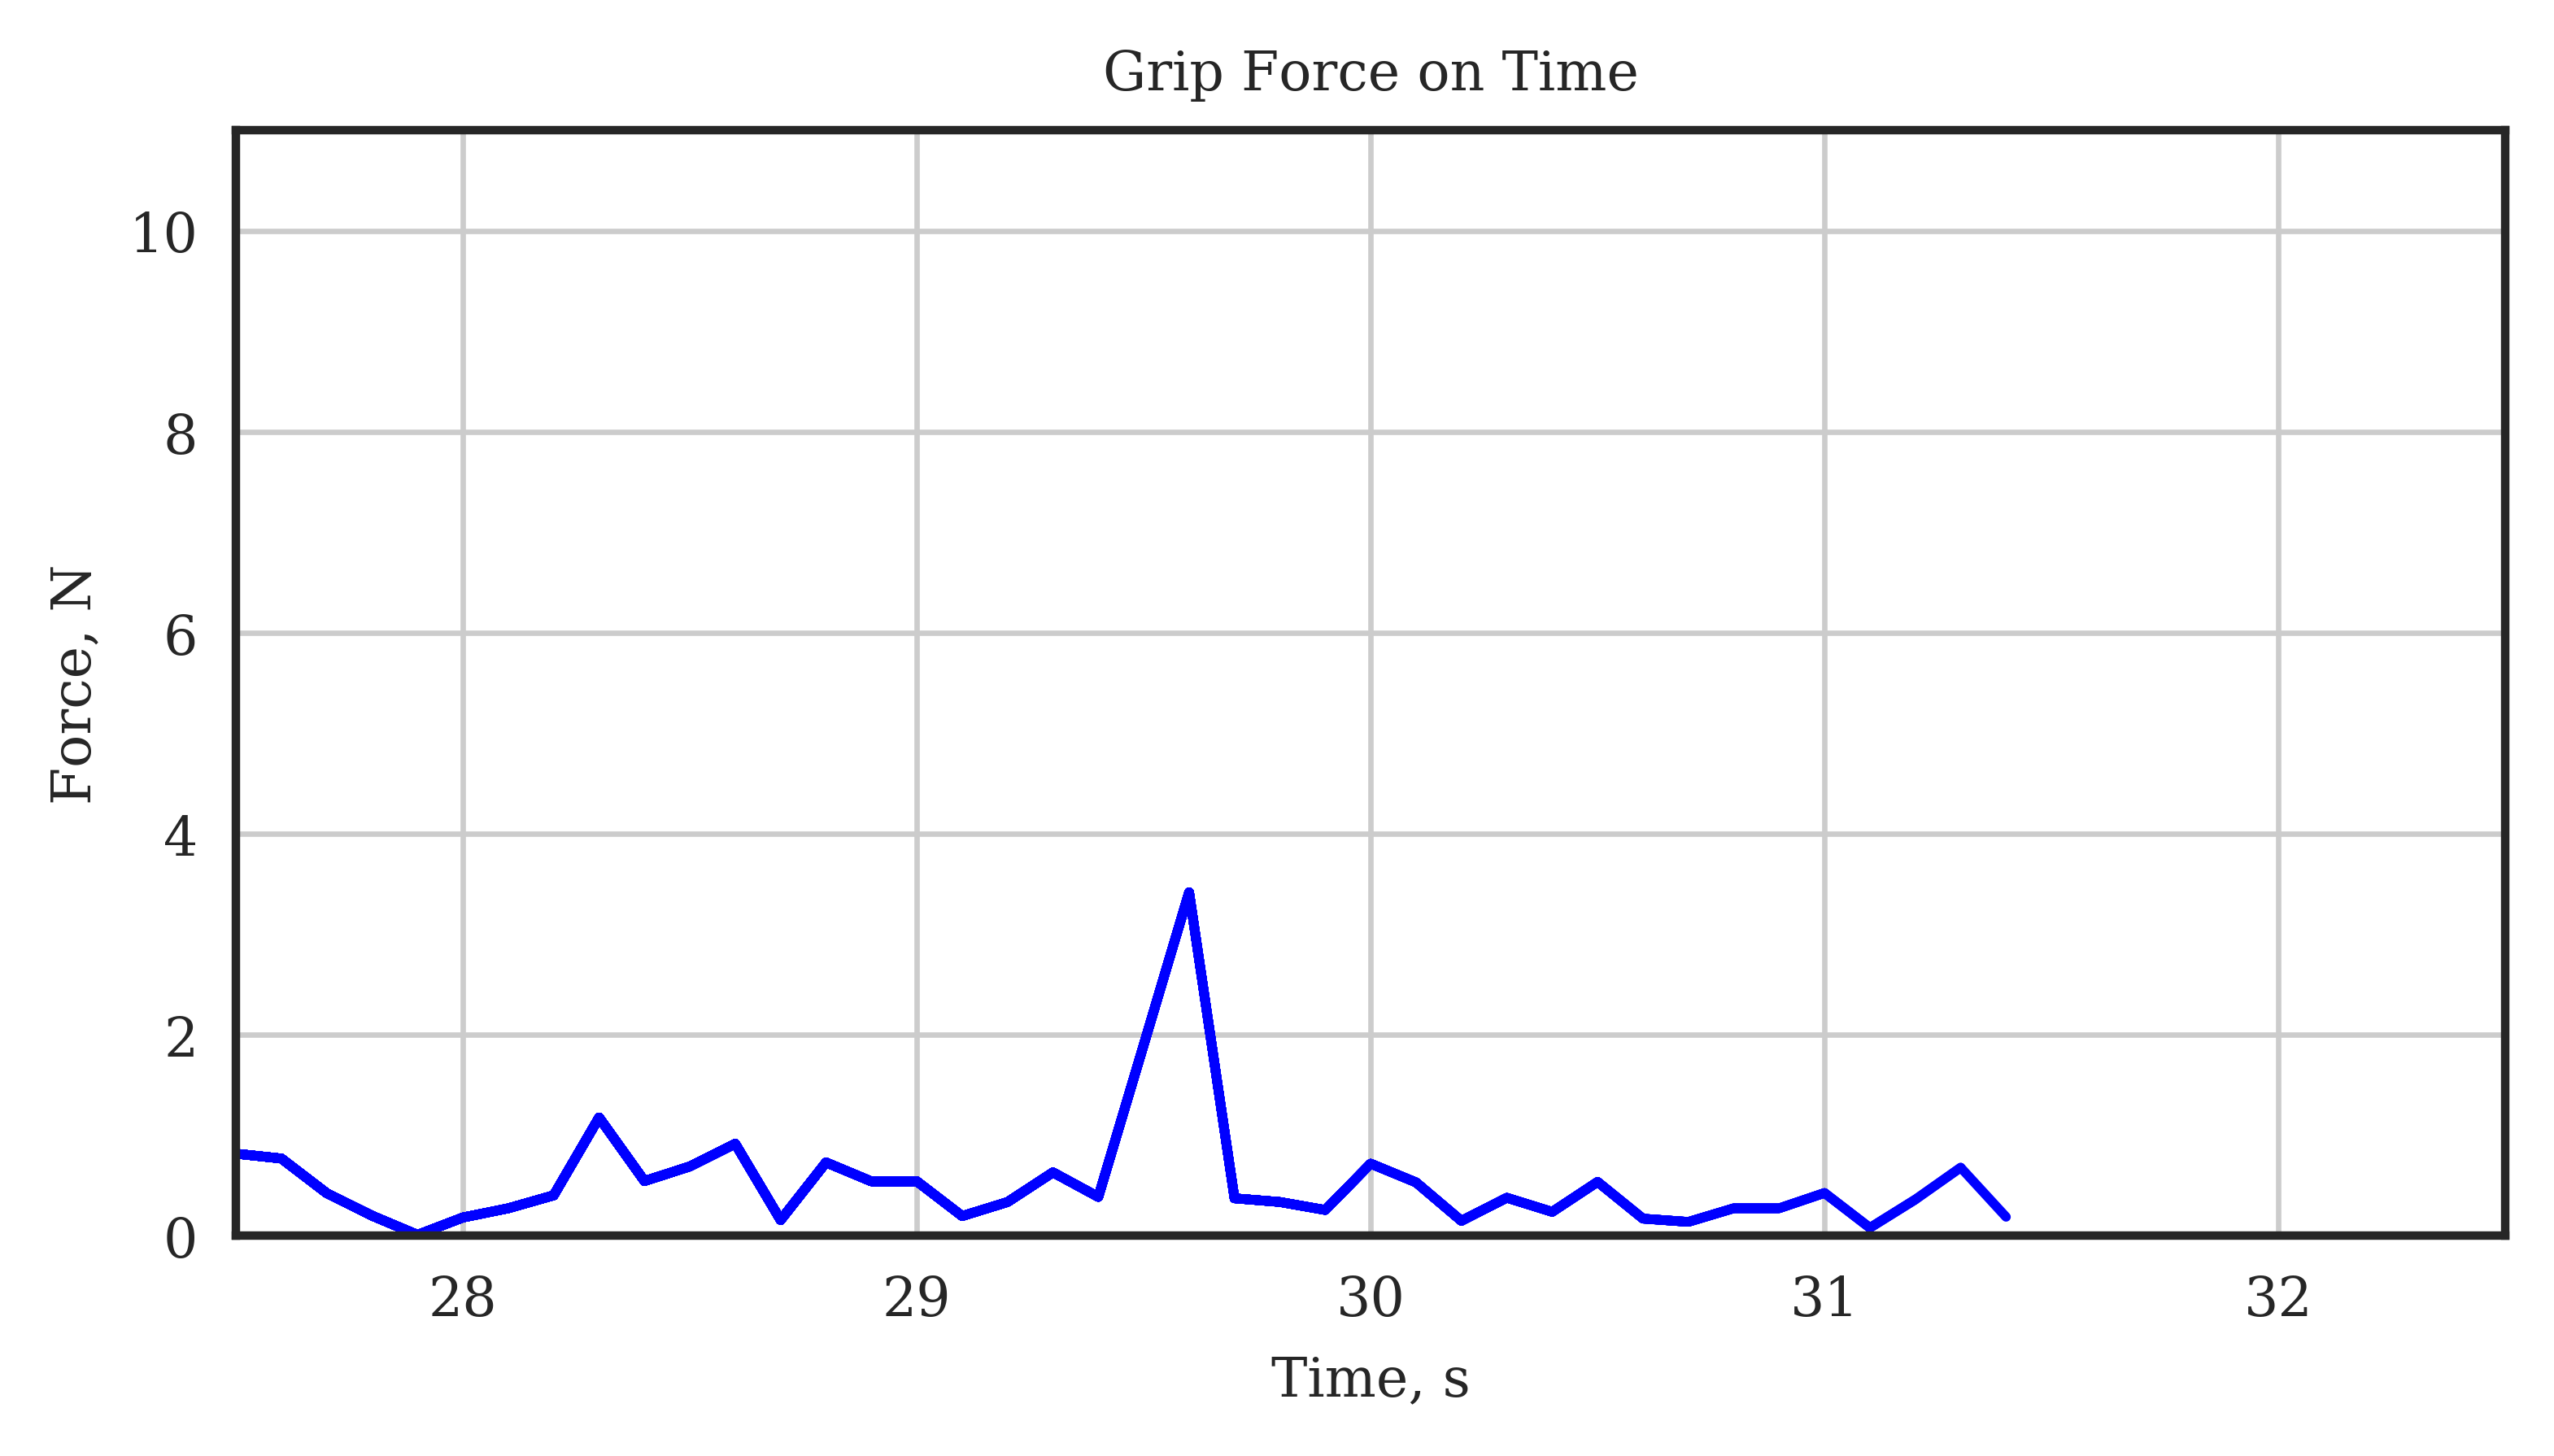

In [111]:
#63 fps, 63*(4 + i/100)
for i in range (0,len(t)):
    
    if i in range (0,41):
        plt.plot(t[:i], frame_force_noisy[:i], 'b')
        plt.xlim(0, 5)
        plt.ylim(0, 11)
        plt.grid(True)
    else:
        plt.plot(t[:i], frame_force_noisy[:i], 'b')
        plt.xlim(i * .1 - 4, i * .1 + 1)
        plt.ylim(0, 11)
        plt.grid(True)
    
    plt.title("Grip Force on Time")
    plt.xlabel('Time, s')
    plt.ylabel('Force, N')
    plt.savefig('ForceV/' + str(i) + '.png')
    #plt.show()